In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


/var/folders/3m/l0tyzx5j5lg1wtczpcc3ff8h0000gn/T/ipykernel_2916/3993962526.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
data = pd.read_csv('../clinical-notes-subsample/customer facing csv files/a_sample_cc_notes.csv',  delimiter="|")

In [5]:
data.shape

(540, 11)

In [7]:
data.head()

,Note_Identifier,Note_Line,Patient_Identifier,Encounter_Identifier,Order_Procedure_Identifier,Note_Created_Date,Last_Note_Edit_Date,Contact_Date,Author_Provider_NPI,Note_Type,"deidentified,,"
0,358,1.0,1.0,22.0,NaN,1900-01-01 00:00:00+00:00,1900-01-01 00:00:00+00:00,1900-01-01 00:00:00+00:00,NaN,NaN,Lesion 1: Guidewire advanced and used as the p...
1,788,1.0,1.0,22.0,NaN,1900-01-01 00:00:00+00:00,1900-01-01 00:00:00+00:00,1900-01-01 00:00:00+00:00,NaN,NaN,"Balloon catheter removed.,,"
2,1041,1.0,1.0,22.0,NaN,1900-01-01 00:00:00+00:00,1900-01-01 00:00:00+00:00,1900-01-01 00:00:00+00:00,NaN,NaN,Diagnostic wire removed. Guidewire tip is inta...
3,129,1.0,1.0,22.0,NaN,1900-01-01 00:00:00+00:00,1900-01-01 00:00:00+00:00,1900-01-01 00:00:00+00:00,NaN,NaN,Contrast Dose Calculator: Patient's age: <AG...
4,1413|1|1|22||1900-01-01 00:00:00+00:00|1900-01...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data.tail()

,Note_Identifier,Note_Line,Patient_Identifier,Encounter_Identifier,Order_Procedure_Identifier,Note_Created_Date,Last_Note_Edit_Date,Contact_Date,Author_Provider_NPI,Note_Type,"deidentified,,"
535,612|1|2|5||1900-01-01 00:00:00+00:00|1900-01-0...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536,201,1.0,2.0,5.0,NaN,1900-01-01 00:00:00+00:00,1900-01-01 00:00:00+00:00,1900-01-01 00:00:00+00:00,1.750588e+09,Consults,Chief Complaint: Jejunal diverticulitis HP...
537,1,5.0,2.0,5.0,NaN,1900-01-01 00:00:00+00:00,1900-01-01 00:00:00+00:00,1900-01-01 00:00:00+00:00,1.740489e+09,Consults,Unremarkable. SMALL BOWEL: No evidence of mass...
538,201,3.0,2.0,5.0,NaN,1900-01-01 00:00:00+00:00,1900-01-01 00:00:00+00:00,1900-01-01 00:00:00+00:00,1.750588e+09,Consults,Albumin 3.0 (L) 3.5 - 5.0 g/dL Globulin 4.4...
539,201,2.0,2.0,5.0,NaN,1900-01-01 00:00:00+00:00,1900-01-01 00:00:00+00:00,1900-01-01 00:00:00+00:00,1.750588e+09,Consults,by mouth daily. <ID> Tablet 1 ‚Ä¢ MAGNESIUM ...


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Note_Identifier             540 non-null    object 
 1   Note_Line                   180 non-null    float64
 2   Patient_Identifier          180 non-null    float64
 3   Encounter_Identifier        180 non-null    float64
 4   Order_Procedure_Identifier  0 non-null      float64
 5   Note_Created_Date           180 non-null    object 
 6   Last_Note_Edit_Date         180 non-null    object 
 7   Contact_Date                180 non-null    object 
 8   Author_Provider_NPI         56 non-null     float64
 9   Note_Type                   81 non-null     object 
 10  deidentified,,              180 non-null    object 
dtypes: float64(5), object(6)
memory usage: 46.5+ KB


## Checking for Duplication

In [10]:
data.nunique()

Note_Identifier               390
Note_Line                       8
Patient_Identifier              6
Encounter_Identifier           58
Order_Procedure_Identifier      0
Note_Created_Date               1
Last_Note_Edit_Date             1
Contact_Date                    1
Author_Provider_NPI            17
Note_Type                       4
deidentified,,                157
dtype: int64

In [11]:
duplicate_rows = data[data.duplicated()]
print(duplicate_rows)

                                       Note_Identifier  Note_Line  \
55                                                  ,,        NaN   
94                                                  ,,        NaN   
95                                                  ,,        NaN   
96                             TOC Disposition: PACU,,        NaN   
97   TOC Checklist PACU: Identification of patient;...        NaN   
..                                                 ...        ...   
510                                                 ,,        NaN   
511                                    <DOCTOR>, MD",,        NaN   
516  <PHONE> Work/School Note Date: <DATE> To Whom ...        NaN   
517                                                 ,,        NaN   
518  <PATIENT> was seen and treated today in the em...        NaN   

     Patient_Identifier  Encounter_Identifier  Order_Procedure_Identifier  \
55                  NaN                   NaN                         NaN   
94               

## Checking Missing Values

In [12]:
data.isnull().sum()

Note_Identifier                 0
Note_Line                     360
Patient_Identifier            360
Encounter_Identifier          360
Order_Procedure_Identifier    540
Note_Created_Date             360
Last_Note_Edit_Date           360
Contact_Date                  360
Author_Provider_NPI           484
Note_Type                     459
deidentified,,                360
dtype: int64

In [14]:
(data.isnull().sum()/(len(data)))*100

Note_Identifier                 0.000000
Note_Line                      66.666667
Patient_Identifier             66.666667
Encounter_Identifier           66.666667
Order_Procedure_Identifier    100.000000
Note_Created_Date              66.666667
Last_Note_Edit_Date            66.666667
Contact_Date                   66.666667
Author_Provider_NPI            89.629630
Note_Type                      85.000000
deidentified,,                 66.666667
dtype: float64

<Axes: >

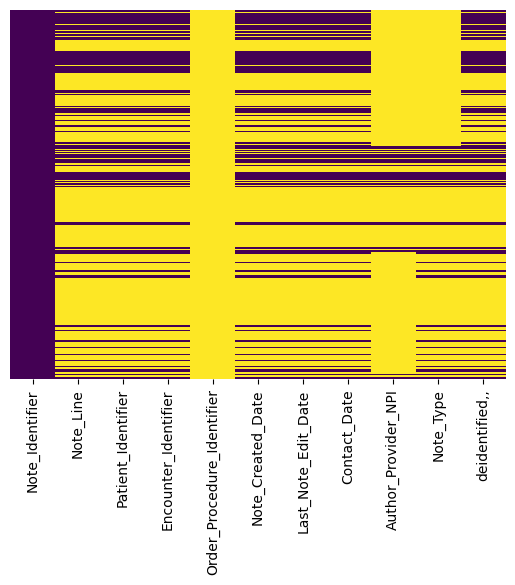

In [15]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
Too Many null values found

## Checking for inconsistent data types

In [18]:
data_types = data.dtypes
print(data_types)

Note_Identifier                object
Note_Line                     float64
Patient_Identifier            float64
Encounter_Identifier          float64
Order_Procedure_Identifier    float64
Note_Created_Date              object
Last_Note_Edit_Date            object
Contact_Date                   object
Author_Provider_NPI           float64
Note_Type                      object
deidentified,,                 object
dtype: object
